# ПРАКТИКУМ
Анашкина, 415

**Общее**

In [1]:
!pip3 install matplotlib

In [1]:
import numpy as np
import matplotlib.pyplot as plt


У нас есть некоторое распределение $\mathbb{P}_t(A)$. Мы хотим научиться семплировать из него. Для начала определим понятие сэмплирования. \\
Рассматриваем вероятностное пространство $(Ω, F, \mathbb{P})$. Хотим построить отображение $\zeta: Ω → \mathbb{R}$, для которого:
$$\mathbb{P}(\zeta^{-1}(A)) = \mathbb{P}_t(A)$$
Проблема заключается в том, что мы не знаем явный вид вероятностного пространства, а лишь знаем некоторое отображение $η: Ω → \mathbb{R}$. Поэтому для конструирования $ζ(ω)$ мы должны построить некоторую детерминированную функцию $ϕ: \mathbb{R} → \mathbb{R}$, которая обеспечит композицию
$$ζ(ω) = ϕ(η(ω))$$

# Задание 1

*1.1 Реализовать генератор схемы Бернулли с заданной вероятностью успеха $p$. Построить на его основе датчик биномиального распределения.*

Целевое распределение задаётся следующим образом:
$$\mathbb{P}_t(A) =
\begin{cases}
1 - p, \quad (0 \in A) ⋅ (1 ∉ A) \\
p, \quad (0 \notin A) ⋅ (1 ∈ A) \\
1, \quad (0 \in A) ⋅ (1 \in A) \\
0, \quad (0 \notin A) ⋅ (1 \notin A)
\end{cases}$$
У нас есть $\eta \sim U[0, 1]$ и верно:
$$\mathbb{P}(\eta \in A) = λ(A)$$
Заметим, что $\mathbb{P}_t$ "чувствительно" только к точкам 0 и 1, поэтому искомая функция $ϕ$ должна принимать значения только 0 и 1. Для такой функции можем записать:
$$\mathbb{P}(ϕ(\eta) \in A) = \mathbb{P}(\eta \in \phi^{-1}(A)) = λ(ϕ^{-1}(A))$$
Таким образом, $λ(\phi^{-1}(0)) = 1 - p$, $λ(\phi^{-1}(1)) = p$
Поэтому в качестве такого отображения можем взять
$$ϕ(x) =
\begin{cases}
0, \quad x \in [0, 1 - p] \\
1, \quad x \in (1 - p, 1]
\end{cases}$$

In [2]:
def bern_rnd(p, *shape):
    if (p > 1) or (p < 0):
        raise ValueError(f"p = {p} is out of bounds [0, 1]!")
    return (np.random.uniform(0.0, 1.0, *shape) > 1 - p).astype(int)

In [23]:
print(bern_rnd(0.5, 6))

[0 0 0 1 1 1]


In [24]:
print(bern_rnd(0.5, [6, 10]))

[[0 1 1 1 1 1 1 1 0 1]
 [1 1 0 0 0 0 1 0 0 1]
 [1 0 0 0 1 0 1 1 1 1]
 [0 0 1 1 0 1 1 0 1 1]
 [1 0 0 1 0 0 0 1 0 1]
 [0 0 0 0 1 0 1 1 0 0]]


C:\Users\Настя\AppData\Local\Temp\ipykernel_24056\3977185011.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(['{:}'.format(int(i)) for i in plt.gca().get_yticks()])


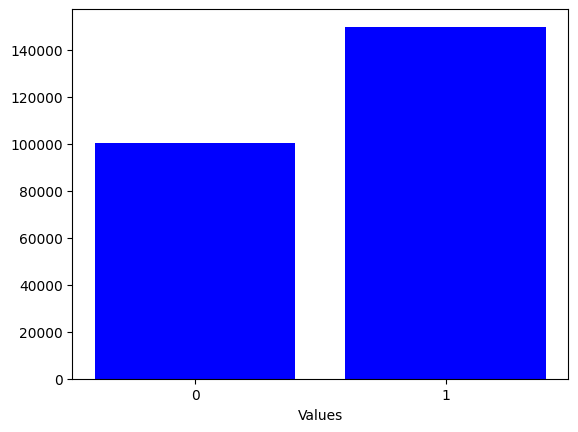

In [5]:
p = 0.6
shape = (500, 500)
sample_bern = bern_rnd(p, shape)
digits = [0, 1]
counts = [shape[1] * shape[0] - np.sum(sample_bern), np.sum(sample_bern)]
plt.bar(digits, counts, color='blue')
#plt.title(f"Схема Бернулли с $p = {p}$")
plt.xticks(digits)
plt.xlabel("Values")
plt.gca().set_yticklabels(['{:}'.format(int(i)) for i in plt.gca().get_yticks()])
plt.savefig('Bern1.eps', format='eps')
plt.show()


Биномиальное распределение - это распределение числа появления события, имеющего вероятность $p$ в $n$ независимых испытаниях. То есть распределение количества успехов в схеме Бернулли.

In [3]:
def binom_rnd(p, n, *shape):
    return bern_rnd(p, (n, *shape)).sum(axis=0)

In [28]:
print(binom_rnd(0.4, 5, 5) / 5)

[0.2 0.  0.6 0.2 0.6]


In [9]:
print(np.random.binomial(5, 0.4, 5))

[3 3 1 4 2]


In [30]:
print(binom_rnd(0.4, 5, 5, 5))

[[2 1 3 2 0]
 [3 4 2 2 3]
 [2 2 3 0 2]
 [2 1 2 2 3]
 [2 3 3 2 3]]


$$var(\eta) = n ⋅ p ⋅ (1 - p)$$
$$\mathbb{E}\eta = n \cdot p$$
Биномиальное распределение можно приблизительно считать унимодальным и симметрическим, поэтому применимо правило "Трёх сигм".

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


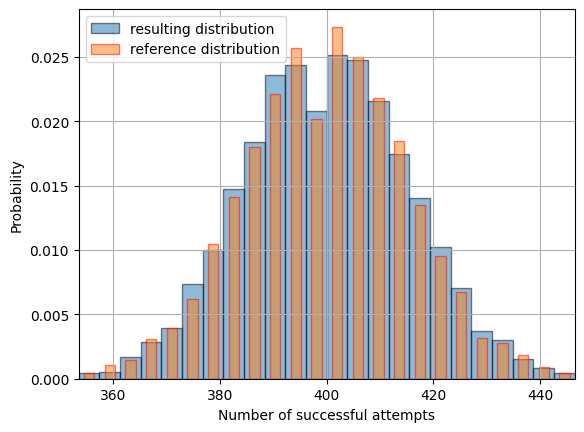

In [11]:
p = 0.4
n = 1000
len = 10000
data = binom_rnd(p, n, len)
#print(data)
ref_data = np.random.binomial(n, p, len) 
#print(ref_data)
mu = n * p
sigma = np.sqrt(n * p * (1 - p))
bins = np.linspace(mu - 3 * sigma, mu + 3 * sigma, 25)
fig, ax = plt.subplots()
ax.hist(data, bins=bins, alpha=0.5, density=True, label='resulting distribution', edgecolor='black')
ax.hist(ref_data, bins=bins, rwidth=0.5, alpha=0.5, density=True, label='reference distribution', edgecolor='red')
ax.set_xlim(mu - 3 * sigma, mu + 3 * sigma)
ax.set_xlabel("Number of successful attempts")
ax.set_ylabel("Probability")
#ax.set_title(f"Binomial distribution with n = {n}, p = {p}")
ax.legend()
ax.grid(True)
plt.savefig('Binom1.eps', format='eps')
plt.show()


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


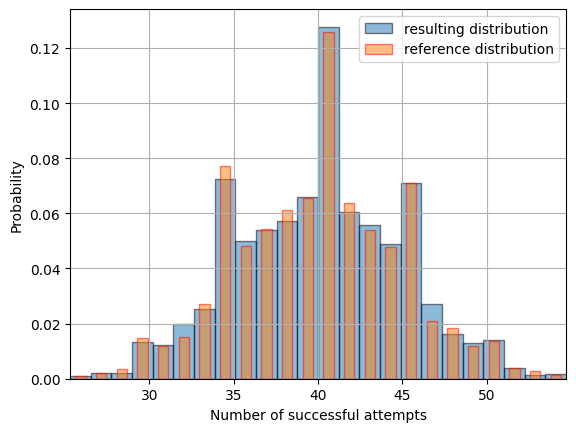

In [17]:
p = 0.4
n = 100
len = 10000
data = binom_rnd(p, n, len)
#print(data)
ref_data = np.random.binomial(n, p, len) 
#print(ref_data)
mu = n * p
sigma = np.sqrt(n * p * (1 - p))
bins = np.linspace(mu - 3 * sigma, mu + 3 * sigma, 25)
fig, ax = plt.subplots()
ax.hist(data, bins=bins, alpha=0.5, density=True, label='resulting distribution', edgecolor='black')
ax.hist(ref_data, bins=bins, rwidth=0.5, alpha=0.5, density=True, label='reference distribution', edgecolor='red')
ax.set_xlim(mu - 3 * sigma, mu + 3 * sigma)
ax.set_xlabel("Number of successful attempts")
ax.set_ylabel("Probability")
#ax.set_title(f"Binomial distribution with n = {n}, p = {p}")
ax.legend()
ax.grid(True)
plt.savefig('Binom2.eps', format='eps')
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


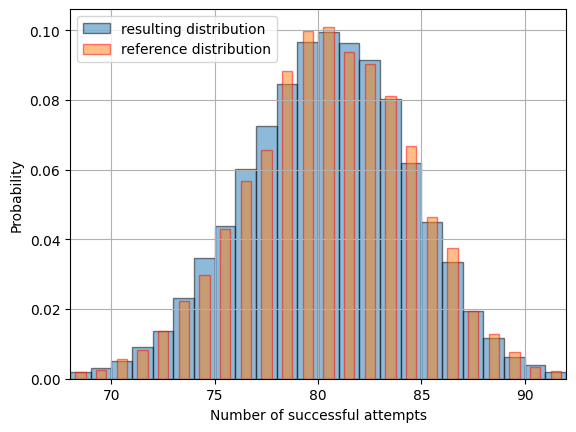

In [18]:
p = 0.8
n = 100
len = 10000
data = binom_rnd(p, n, len)
#print(data)
ref_data = np.random.binomial(n, p, len) 
#print(ref_data)
mu = n * p
sigma = np.sqrt(n * p * (1 - p))
bins = np.linspace(mu - 3 * sigma, mu + 3 * sigma, 25)
fig, ax = plt.subplots()
ax.hist(data, bins=bins, alpha=0.5, density=True, label='resulting distribution', edgecolor='black')
ax.hist(ref_data, bins=bins, rwidth=0.5, alpha=0.5, density=True, label='reference distribution', edgecolor='red')
ax.set_xlim(mu - 3 * sigma, mu + 3 * sigma)
ax.set_xlabel("Number of successful attempts")
ax.set_ylabel("Probability")
#ax.set_title(f"Binomial distribution with n = {n}, p = {p}")
ax.legend()
ax.grid(True)
plt.savefig('Binom3.eps', format='eps')
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


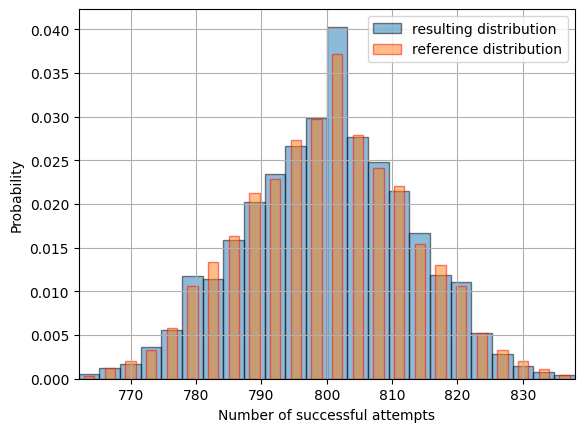

In [20]:
p = 0.8
n = 1000
len = 10000
data = binom_rnd(p, n, len)
#print(data)
ref_data = np.random.binomial(n, p, len) 
#print(ref_data)
mu = n * p
sigma = np.sqrt(n * p * (1 - p))
bins = np.linspace(mu - 3 * sigma, mu + 3 * sigma, 25)
fig, ax = plt.subplots()
ax.hist(data, bins=bins, alpha=0.5, density=True, label='resulting distribution', edgecolor='black')
ax.hist(ref_data, bins=bins, rwidth=0.5, alpha=0.5, density=True, label='reference distribution', edgecolor='red')
ax.set_xlim(mu - 3 * sigma, mu + 3 * sigma)
ax.set_xlabel("Number of successful attempts")
ax.set_ylabel("Probability")
#ax.set_title(f"Binomial distribution with n = {n}, p = {p}")
ax.legend()
ax.grid(True)
plt.savefig('Binom4.eps', format='eps')
plt.show()

*1.2 Реализовать генератор геометрического распределения; проверить для данного распределения свойство отсутствия памяти.*

Определим геометричское распределение следующим оразом:
$$\mathbb{P}(\eta = k) = p \cdot (1 - p)^k$$
То есть, как вероятность того, что в схеме Бернулли спроизошло k неудач до первого успеха. Тогда случаная величина $\eta$ - число неудач до появления первого успеха. \\
Воспользуемся методом обратных функций. Введём обозначение:
$$s_{n+1} = p_0 + ... + p_n = \sum_{i=0}^{n}p(1 - p)^i = 1 - (1 - p)^{n + 1}$$
Тогда событие: число неудач до появления первого успеха равно n, можно интерпретировать как событие: значение случайной величины из равномерного равспределения на [0, 1] находится между $s_n$ и $s_{n+1}$. Запишем это на математическом языке:
$$\{\eta = n\} = \{s_n < \alpha \leq s_{n+1}\} = \{1 - (1 - p)^n < \alpha \leq 1 - (1 - p)^{n + 1}\} = $$
$$ = \{(1 - p)^{n + 1} \leq 1 - \alpha < (1 - p)^n\} = \{(n+1)\ln (1 - p) \leq \ln(1 - \alpha) < n \ln(1 - p)\} = \{n < \frac{\ln(1 - \alpha)}{\ln(1 - p)} \leq n + 1\},$$
Ввиду того, что $\alpha \sim U[0, 1]$:
$$\eta = \lfloor \frac{\ln(\alpha)}{\ln(1 - p)} \rfloor$$   

In [4]:
import math

In [5]:
def geom_rnd(p, *shape):
    if (p < 0) or (p > 1):
        raise ValueError(f"p = {p} is out of bounds [0, 1]!")
    uni_rnd = np.random.uniform(0.0, 1.0, *shape)
    sample = np.floor(np.log(uni_rnd) / math.log(1 - p))
    return sample

In [70]:
print(geom_rnd(0.2, 5))

[2. 2. 8. 7. 6.]


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


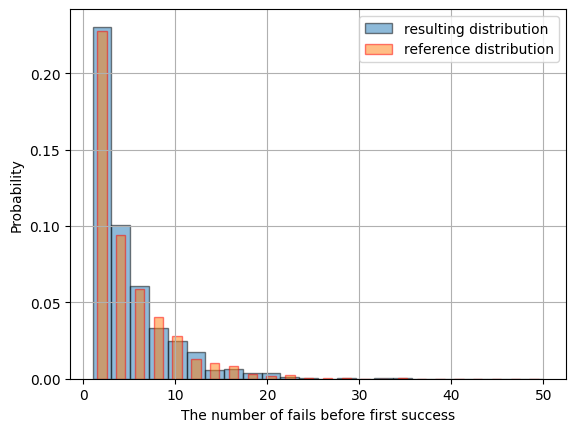

In [23]:
p = 0.2
bins_1 = np.linspace(1, 50, 25)
len = 1000
data = geom_rnd(p, len)
ref_data = np.random.geometric(p, len) 
fig, ax = plt.subplots()
ax.hist(data, bins=bins_1, alpha=0.5, density=True, label='resulting distribution', edgecolor='black')
ax.hist(ref_data, bins=bins_1, rwidth=0.5, alpha=0.5, density=True, label='reference distribution', edgecolor='red')
ax.set_xlabel("The number of fails before first success")
ax.set_ylabel("Probability")
#ax.set_title(f"Geometric distribution with p = {p}")
ax.legend()
ax.grid(True)
plt.savefig('Geom1.eps', format='eps')
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


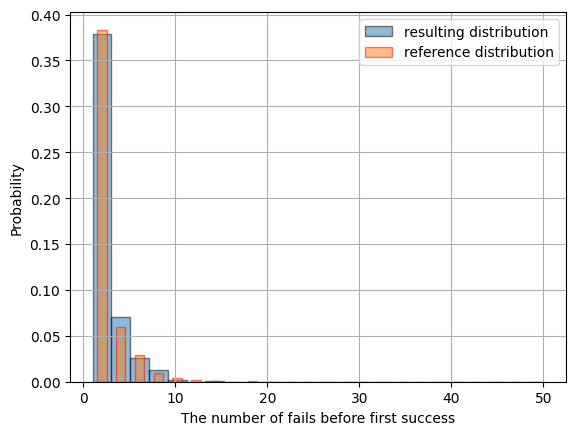

In [27]:
p = 0.4
bins_1 = np.linspace(1, 50, 25)
len = 1000
data = geom_rnd(p, len)
ref_data = np.random.geometric(p, len) 
fig, ax = plt.subplots()
ax.hist(data, bins=bins_1, alpha=0.5, density=True, label='resulting distribution', edgecolor='black')
ax.hist(ref_data, bins=bins_1, rwidth=0.5, alpha=0.5, density=True, label='reference distribution', edgecolor='red')
ax.set_xlabel("The number of fails before first success")
ax.set_ylabel("Probability")
#ax.set_title(f"Geometric distribution with p = {p}")
ax.legend()
ax.grid(True)
plt.savefig('Geom2.eps', format='eps')
plt.show()

Свойство отсутсвтия памяти:
$$\mathbb{P}(\eta > m + n | \eta \geq m) = \mathbb{P}(\eta > n), \quad \forall m, n \in \mathbb{N}$$
Или, проще говоря, число прошлых неудач не влияет на число будущих неудач.

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


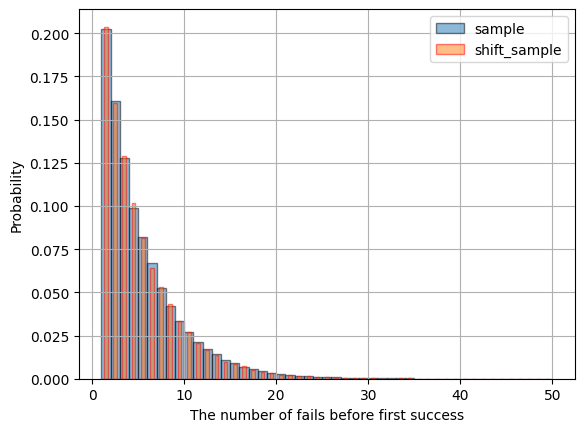

In [28]:
p = 0.2
bins_1 = np.linspace(1, 50, 50)
len = 100000
n = 5
sample_geom = geom_rnd(p, len)
sample_shift = geom_rnd(p, len)
sample_shift = sample_geom[sample_geom >= n]

fig, ax = plt.subplots()
ax.hist(sample_geom, bins=bins_1, alpha=0.5, density=True, label='sample', edgecolor='black')
ax.hist(sample_shift - n, bins=bins_1, rwidth=0.4, alpha=0.5, density=True, label='shift_sample', edgecolor='red')
ax.set_xlabel("The number of fails before first success")
ax.set_ylabel("Probability")
#ax.set_title(f"Geometric distribution with p = {p}")
ax.legend()
ax.grid(True)
plt.savefig('Geom3.eps', format='eps')
plt.show()


*1.3 Промоделировать игру в орлянку: бесконечную последовательность независимых испытаний Бернулли с бросанием "правильной" монеты. Величина выигрыша $S_n$ определяется как сумма по $n$ испытаниям значений 1 и -1 в зависимости от выпавшей стороны монеты. Проиллюстрировать в виде ломаной поведение нормированной суммы $Y(i) = \frac{S_i}{\sqrt{n}}$ как функцию от номера испытания $i$ для отдельно взятой траектории. Дать теоретическую оценку для значения $Y(n)$ при $n \rightarrow \infty$*

Введём последовательность случайных величин $X_1, X_2, ...$. Будем моделировать их с помощью генератора схемы Бернулли с параметром 0.5. По условию значения, которые принимает случайная величина 1 и -1, поэтому в выборке, сгенерированной с помощью схемы Бернулли заменим все 0 на -1.  

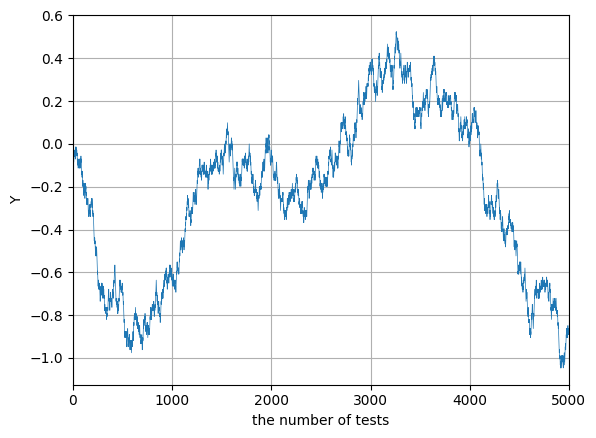

In [31]:
N = 5000 #число испытаний
X = bern_rnd(0.5, N)
X[X == 0] = -1
Y = np.cumsum(X)
Y = Y / math.sqrt(N)
iters = np.linspace(0, N, N)
plt.plot(iters, Y, linewidth=0.5)
plt.xlim(0, N)
plt.xlabel('the number of tests')
plt.ylabel('Y')
#plt.title("Game")
plt.grid(True)
plt.savefig('Orl.eps', format='eps')
plt.show()



Далее дадим теоретическую оценку для значения $Y(n)$. $\\$
ЦПТ: $\\$
Пусть $X_1, X_2,...$ - последовательность независимых одинаково распределённых случайных величин с $\mathbb{E}X_1^2 < \infty$ и $S_n = X_1 + ... + X_n$. Тогда при $n \rightarrow \infty$ для $\forall x \in \mathbb{R}$ имеем
$$\mathbb{P}(\frac{S_n - \mu}{\sigma} \leq x) \rightarrow N(0, 1)$$


В нашем случае случайные величины $X_1, X_2, ...$ за счёт реализации через схему Бернулли являются независимыми одинаково распределёнными. Значит можем применить ЦПТ. $\\$
$$\mu = \mathbb{E}(\sum_{i=1}^n X_i) = \sum_{i=1}^n \mathbb{E}X_i = n \cdot \mathbb{E}X_i = n \cdot (1 \cdot 0.5 - 1 \cdot 0.5) = 0$$
$$var(S_n) = n \cdot var(X_i) = n \cdot (\mathbb{E}X_i^2 - (\mathbb{E}X_i)^2) = n \cdot (1 - 0) = n$$
$$\mathbb{P}(\frac{S_n - \mu}{\sigma} \leq x) = \mathbb{P}(\frac{S_n}{\sqrt n} \leq x) \rightarrow N(0, 1)$$
Таким образом, $$Y(n) \rightarrow N(0, 1), \quad n \rightarrow \infty$$

# Задание 2

*2.1 Построить датчик сингулярного распределения, имеющий в качестве функции распределения канторову лестницу. С помощью критерия Колмогорова убедиться в корректности работы датчика*

Можем перейти в тричную систему счисления, в которой есть только цифры ${0, 1, 2}$, и числа из $[0, 1]$ разложены по отрицательным степеням тройки. Канторово множество содержит числа, в которых нет цифры 1. Таким образом, для построения генератора такого распределения можем использовать генератор схемы Бернулли. Тогда, умножив на 2 вектор случайных величин из схемы Бернулли получим число в троичной записи, останется перевести его обратно в 10-ю систему счисления. Так как мы не можем сгенерировать бесконечное число, необходимо ввести дополнительный параметр $\epsilon$. 
$$\sum_{n=N+1}^{+\infty}\frac{2\cdot \eta_n}{3^n} \leq \sum_{n=N+1}^{+\infty}\frac{2}{3^n} = \frac{2 \cdot 3}{2 \cdot 3^N} = \frac{1}{3^N} \leq \epsilon$$
Таким образом, можем получить длину дробной части числа, достаточную для получения заданной точности:
$$N \geq \frac{\ln \frac{1}{\epsilon}}{\ln 3}$$  
Значение функции распределения можем посчитать по формуле:
$$F(x) = \sum_{n=1}^{N}\frac{\eta_n}{2^n},\quad x = \sum_{n=1}^{N}\frac{2\cdot \eta_n}{3^n}$$

In [6]:
def Cantor_rnd(m: int = 1, eps: float = 1e-10):
    N = math.ceil(math.log(1 / eps) / math.log(3)) # число столбцов(длина дробной части) 
    bern_sample = bern_rnd(0.5, (m, N))
    degree = - np.linspace(1, N, N)
    Cantor_sample = 2 * bern_sample @ np.power(3, degree)
    Cantor_value = bern_sample @ np.power(2, degree)
    return Cantor_sample, Cantor_value

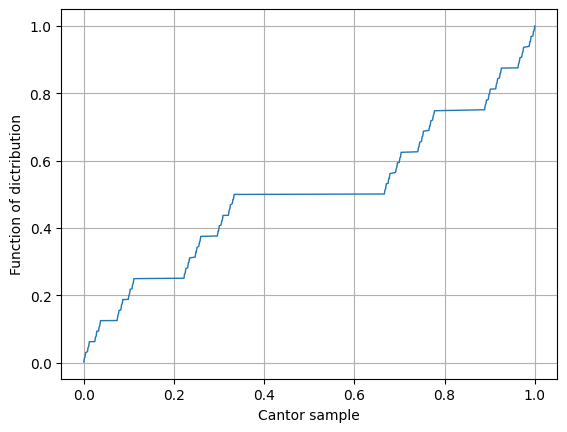

In [33]:
m = 1000
eps = 1e-10
Cantor_sample, Cantor_value = Cantor_rnd(m, eps)
plt.plot(np.sort(Cantor_sample), np.sort(Cantor_value), linewidth=1)
plt.xlabel('Cantor sample')
plt.ylabel('Function of dictribution')
#plt.title("Cantor function")
plt.grid(True)
plt.savefig('cantor.eps', format='eps')
plt.show()

Применение критерия Колмогорова


Статистика критерия для эмпирической функции распределения $F_n(x)$ определяется следующим образом:
$$D_n = \sup_{x \in \mathbb{R}}|F_n(x) - F(x)|$$
Для проверки простой гипотезы $H_0$ о соответствии выборки известному закону распределения с заданным уровкем значимости $\alpha$ и правосторонней критической областью воспользуемся подходом на основе p-значения для статистики $\sqrt{n} D_n$. Нулевая гипотеза принимается, если $p = 1 - F_K(\sqrt{n}D_n)$ превышает заданный уровень значимости $\alpha$. Будем пользоваться следующим представлением функции распределения Колмогорова:
$$F_K(x) = 1 + 2\sum_{k=1}^{+\infty}(-1)^k \exp^{-2k^2x^2}$$ 

In [7]:
def Kolmogorov_dist(x):
    N = 10000
    dist = 0
    for k in range(1, N+1):
        dist += (-1)**k * math.exp(- 2 * k**2 * x**2)
    return 1 + 2 * dist

In [6]:
from scipy.stats import ecdf

In [9]:
def Kolmogorov_crit(F_n, F, alpha: int=0.02):
    stat = np.max(np.abs(F_n - F))
    #print(stat)
    #print(np.sqrt(np.shape(F)[0]))
    stat = np.sqrt(np.shape(F)[0]) * stat
    p_value = 1 - Kolmogorov_dist(stat)
    if p_value > alpha:
        return True
    return False

In [11]:
n_tests = 10000
eps = 1e-15
m = 1000
alpha = 0.02
n_matches = 0
for i in range(n_tests):
    Cantor_sample, Cantor_val = Cantor_rnd(m, eps)
    Cantor_n = ecdf(Cantor_sample).cdf.evaluate(Cantor_sample)
    n_matches += Kolmogorov_crit(Cantor_n, Cantor_val, alpha)
#print(n_matches)
print(f"Null hypotheses is accepted in {n_matches / n_tests * 100:.2f} % cases")

Null hypotheses is accepted in 98.34 % cases


*2.2 Для Канторовых случайных величин с помощью критерия Смирнова проверить свойство симметричности относительно $\frac{1}{2}$ и свойство самоподобия относительно деления на 3*

Будем рамматривать две выборки:
$$X = (X_1, X_2, ..., X_n)$$
$$Y = (Y_1, Y_2, ..., Y_m)$$
Нашей целью является проверка гипотезы о принадлежности выборок $X$ и $Y$ одному распределению.
Критерий Смирнова: $\\$
Статистика критерия для эмпирических функций распределения $F_n(x)$ и $G_m(x)$, построенным по выборкам $X$ и $Y$определяется следующим образом:
$$D_{n,m} = \sup_{x \in \mathbb{R}} |F_n - G_m|$$
Воспользуемся p-value подходом для статистики $\sqrt{\dfrac{nm}{n + m}}D_{n,m}$. Нулевая гипотеза $H_0$ принимается, если 
$$p = 1 - F_K(\sqrt{\dfrac{nm}{n + m}}D_{n,m}) > \alpha$$

In [10]:
def Smirnov_crit(sample1, sample2, alpha):
    n = len(sample1)
    m = len(sample2)
    sample = np.concatenate([sample1, sample2])
    #sample = np.sort(np.unique(sample))
    sample = np.linspace(np.min([sample1.min(), sample2.min()]), np.max([sample1.max(), sample2.max()]))
    ecdf1 = np.sort(ecdf(sample1).cdf.evaluate(sample))
    ecdf2 = np.sort(ecdf(sample2).cdf.evaluate(sample))
    stat = np.max(np.abs(ecdf1 - ecdf2))
    stat = math.sqrt(n * m / (n + m)) * stat
    p_value = 1 - Kolmogorov_dist(stat)
    if p_value > alpha:
        return True
    return False

Свойство симметричности относительно $\frac{1}{2}$ можно интерпретировать как одинаковую распределённость выборок $X$ и $1 - X$

In [21]:
n_test = 1000
eps = 1e-15
m = 1000
alpha = 0.1
n_matches = 0
for i in range(n_test):
    sample1, distr_val = Cantor_rnd(m, eps)
    sample2 = 1 - sample1
    n_matches += Smirnov_crit(sample1, sample2, alpha)
#print(n_matches)
print(f"Null hypotheses is accepted in {n_matches / n_test * 100:.2f} % cases")

Null hypotheses is accepted in 87.50 % cases


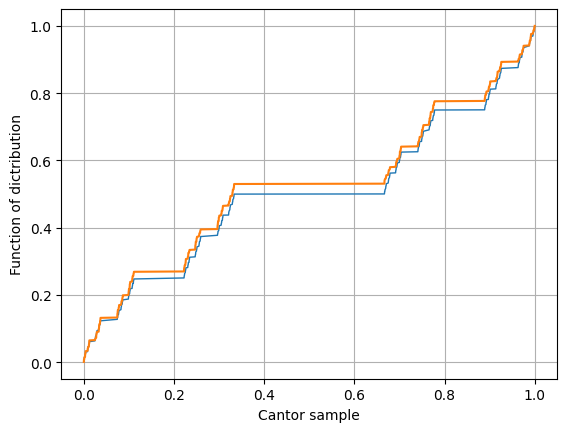

In [23]:
sample1, distr_val = Cantor_rnd(1000, eps)
sample2 = 1 - sample1
plt.plot(np.sort(sample1), np.sort(distr_val), linewidth=1)
plt.plot(np.sort(sample2), np.sort(ecdf(sample2).cdf.evaluate(sample2)))
plt.xlabel('Cantor sample')
plt.ylabel('Function of dictribution')
#plt.title("Cantor function")
plt.grid(True)
plt.savefig('smirn1.eps', format='eps')
plt.show()

Свойство самоподобия относительно деления на 3 можно интерпретировать как то, что условное распределение $Y$ при условии $Y \in [0, \frac{1}{3}]$ совпадает с распределением $\frac{Y}{3}$.

In [32]:
n_test = 1000
eps = 1e-15
m = 1000
alpha = 0.1
n_matches = 0
for i in range(n_test):
    sample1, _ = Cantor_rnd(m, eps)
    sample1 = sample1[sample1 <= 1 / 3]
    sample2, _ = Cantor_rnd(m, eps) 
    n_matches += Smirnov_crit(sample1, sample2 / 3, alpha)
#print(n_matches)
print(f"Null hypotheses is accepted in {n_matches / n_test * 100:.2f} % cases")

Null hypotheses is accepted in 94.10 % cases


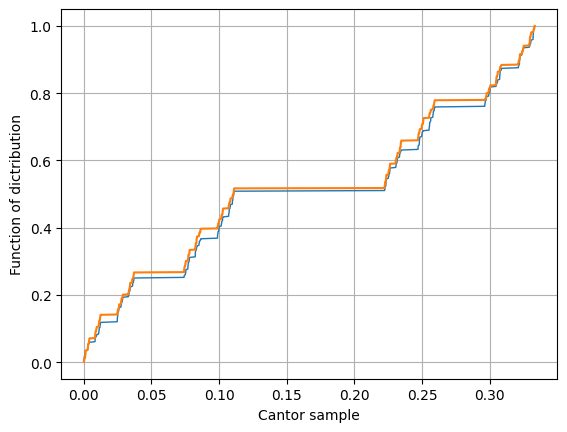

In [33]:
sample1, _ = Cantor_rnd(1000, eps)
sample1 = sample1[sample1 <= 1 / 3]
sample2, _ = Cantor_rnd(1000, eps)
sample2 = sample2 / 3
plt.plot(np.sort(sample1), np.sort(ecdf(sample1).cdf.evaluate(sample1)), linewidth=1)
plt.plot(np.sort(sample2), np.sort(ecdf(sample2).cdf.evaluate(sample2)))
plt.xlabel('Cantor sample')
plt.ylabel('Function of dictribution')
#plt.title("Cantor function")
plt.grid(True)
plt.savefig('smirn2.eps', format='eps')
plt.show()

*2.3 Рассчитать значения математического ожидания и дисперсии для данного распределения. Сравнить теоретические значения с эмпирическими, проиллюстрировать сходимость эмпирических значений к теоретическим.*

Пусть случайная величина $X$ имеет сингулярное распределение, в качестве функции распределения - Канторова лестница.  Посчитаем математическое ожидание и дисперсию для данного распределения.
$$\mathbb{E}X = \mathbb{E}\sum_{n=1}^{+\infty}\frac{2\cdot \eta_n}{3^n} = \sum_{n=1}^{+\infty}\frac{2}{3^n}\mathbb{E}\eta_n = \sum_{n=1}^{+\infty}\frac{2}{3^n}(0 \cdot 0.5 + 1 \cdot 0.5) = \frac{1}{2}$$
$$var(X) = var(\sum_{n=1}^{+\infty}\frac{2\cdot \eta_n}{3^n})  = \sum_{n=1}^{+\infty}\frac{4}{3^{2n}} \cdot var(\eta_n)$$
$$var(\eta) = \mathbb{E}\eta^2 - (\mathbb{E}\eta)^2 = (0 \cdot 0.5 + 1 \cdot 0.5) - (0 \cdot 0.5 + 1 \cdot 0.5)^2 = \frac{1}{4}$$
$$var(X) = \sum_{n=1}^{+\infty}\frac{4}{3^{2n}} \cdot \frac{1}{4} = \frac{1}{8}$$

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


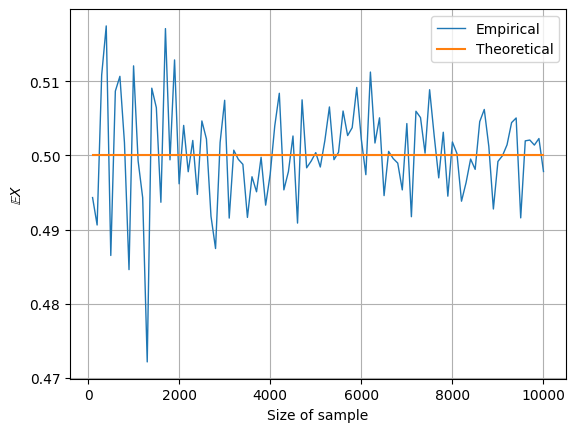

In [34]:
N_start = 100
N_fin = 10000
step = 100
eps = 1e-15
mean_vec = []
var_vec = []
for i in range(N_start, N_fin + 1, step):
    sample, _ = Cantor_rnd(i, eps)
    mean_vec.append(sample.mean())
    var_vec.append(sample.var())
plt.plot(np.linspace(N_start, N_fin + 1, step), mean_vec, linewidth=1, label="Empirical")
plt.plot(np.linspace(N_start, N_fin + 1, step), 1 / 2 * np.ones(len(mean_vec)), label="Theoretical")
plt.xlabel('Size of sample')
plt.ylabel('$\mathbb{E}X$')
plt.legend()
plt.grid(True)
plt.savefig('mat_ozh.eps', format='eps')
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


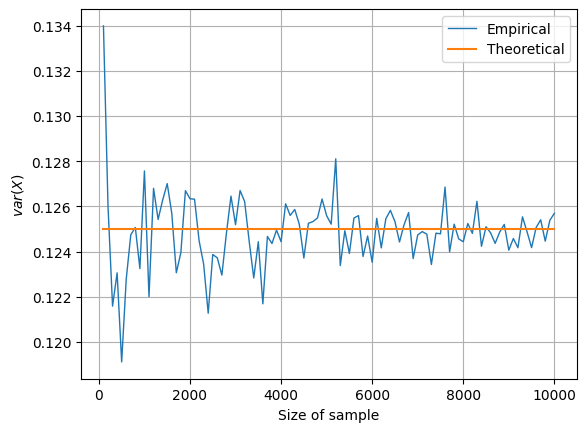

In [35]:
plt.plot(np.linspace(N_start, N_fin + 1, step), var_vec, linewidth=1, label="Empirical")
plt.plot(np.linspace(N_start, N_fin + 1, step), 1 / 8 * np.ones(len(mean_vec)), label="Theoretical")
plt.xlabel('Size of sample')
plt.ylabel('$var(X)$')
plt.legend()
plt.grid(True)
plt.savefig('var.eps', format='eps')
plt.show()

# Задание 3

*3.1 Построить датчик экспоненциального распределения. Проверить для этого распределения свойство отсутствия памяти.*

Случайная величина $X$ имеет экспоненциальное распределение с параметром $\lambda$, если её функция распределения имеет вид:
$$F_X(x) = 
\begin{cases}
1 - e^{-\lambda x}, \quad x \geq 0, \\
0, \quad x > 0
\end{cases}
$$
В данном случае можем воспользоваться методом обратных функций. 
$$y = 1 - e^{-\lambda x}$$
$$-\lambda x = \ln(1 - y)$$
$$x = -\frac{\ln(1 - y)}{\lambda}$$
Таким образом, случайная величина $X$ имеет экспоненциальное распределение с параметром $\lambda$, если $X = -\dfrac{\ln(1 - Y)}{\lambda}$, где $Y \sim U[0, 1]$.

In [7]:
def exp_rnd(lamb, *shape):
    if lamb < 0:
        raise ValueError(f"$\lambda$ = {lamb} is less then 0!")
    unif_sample = np.random.uniform(0.0, 1.0, *shape)
    return - np.log(1 - unif_sample) / lamb

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


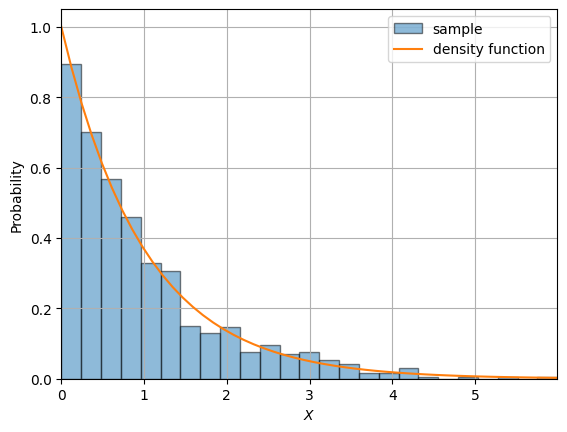

In [26]:
n = 1000
lamb = 1
exp_sample = exp_rnd(lamb, n)
fig, ax = plt.subplots()
ax.hist(exp_sample, bins=25, alpha=0.5, density=True, label='sample', edgecolor='black')
ax.plot(x := np.linspace(0, exp_sample.max()), lamb * np.exp(-lamb * x), label="density function") #функция плотности вероятности
#ax.set_ylim()
ax.set_xlim([0, exp_sample.max()])
ax.set_xlabel(r'$X$')
ax.set_ylabel("Probability")
#ax.set_title(f"Exponential distribution with $\lambda$ ={lamb}")
ax.legend()
ax.grid(True)
plt.savefig('exp.eps', format='eps')
plt.show()


Свойство отсутствия памяти для непрерывного распределения может быть свормулировано аналогично дискретному распределению.


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


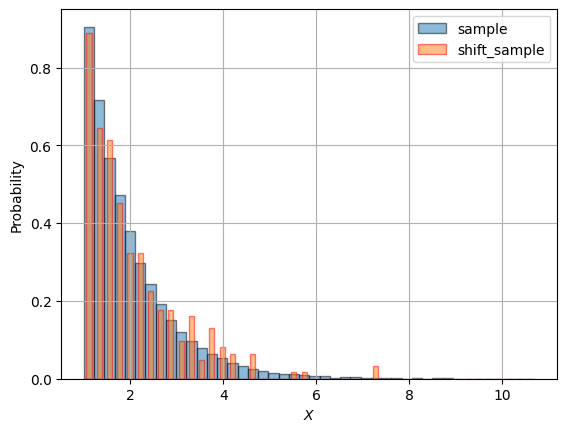

In [29]:
len = 100000
lamb = 1
n = 5
sample_exp = exp_rnd(lamb, len)
bins_1 = np.linspace(1, sample_exp.max(), 45)
sample_shift = exp_rnd(lamb, len)
sample_shift = sample_shift[sample_shift >= n]

fig, ax = plt.subplots()
ax.hist(sample_exp, bins=bins_1, alpha=0.5, density=True, label='sample', edgecolor='black')
ax.hist(sample_shift - n, bins=bins_1, rwidth=0.5, alpha=0.5, density=True, label='shift_sample', edgecolor='red')
ax.set_xlabel(r'$X$')
ax.set_ylabel("Probability")
#ax.set_title(f"Exponential distribution with $\lambda$ = {lamb}")
ax.legend()
ax.grid(True)
plt.savefig('exp1.eps', format='eps')
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


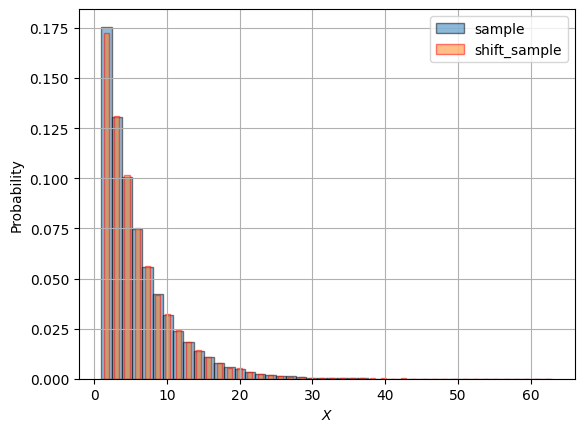

In [30]:
len = 100000
lamb = 0.2
n = 5
sample_exp = exp_rnd(lamb, len)
bins_1 = np.linspace(1, sample_exp.max(), 45)
sample_shift = exp_rnd(lamb, len)
sample_shift = sample_shift[sample_shift >= n]

fig, ax = plt.subplots()
ax.hist(sample_exp, bins=bins_1, alpha=0.5, density=True, label='sample', edgecolor='black')
ax.hist(sample_shift - n, bins=bins_1, rwidth=0.5, alpha=0.5, density=True, label='shift_sample', edgecolor='red')
ax.set_xlabel(r'$X$')
ax.set_ylabel("Probability")
#ax.set_title(f"Exponential distribution with $\lambda$ = {lamb}")
ax.legend()
ax.grid(True)
plt.savefig('exp2.eps', format='eps')
plt.show()

*3.2 Пусть $X_1, X_2, ..., X_n$ - независимые экспоненциально распределённые случайные величины параметрами $\lambda_1, ..., \lambda_n$. Найти распределение случайной величины $Y = min(X_1, ...,X_n)$.* 

По определению:
$$\mathbb{P}(Y < x) = 1 - \mathbb{P}(Y \geq x) = 1 - \mathbb{P}(X_1 \geq x, ..., X_n \geq x)$$
По условию $X_1, ..., X_n$ - независимые случайные величины. Значит можем продолжить равенство:
$$\mathbb{P}(Y < x) = 1 - \mathbb{P}(X_1 \geq x) \cdot ... \cdot \mathbb{P}(X_n \geq x) = 1 - \prod_{i=1}^{n}(1 - (1 - e^{-\lambda_i x})) = 1 - \prod_{i=1}^{n}(e^{-\lambda_i x}) =$$
$$= 1 - e^{\sum_{i=1}^n -\lambda_i x} = 1 - e^{- x \cdot \sum_{i=1}^n \lambda_i}$$ 

Таким образом, получили, что случайная величина $Y$ имеет экспоненциальное распределение с параметром $\sum_{i=1}^n \lambda_i$. LДалее рассмотрим пример, показывающий точность аналитических вычислений. 

In [31]:
def min_rnd(n, lam): #lam - веткор строка
    X = np.ones([np.shape(lam)[0], n])
    for i in range(np.shape(lam)[0]):
        X[i] = exp_rnd(lam[i], n)
    return np.min(X, axis=0)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


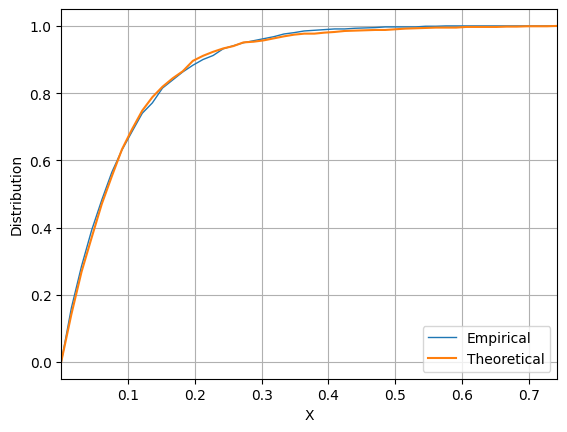

In [32]:
len = 1000
n = 20
lam = np.random.uniform(0.0, 1.0, n)
sample1 = min_rnd(len, lam)
sample2 = exp_rnd(np.sum(lam), len)
sample = np.linspace(np.min([sample1.min(), sample2.min()]), np.max([sample1.max(), sample2.max()]))
ecdf1 = np.sort(ecdf(sample1).cdf.evaluate(sample))
ecdf2 = np.sort(ecdf(sample2).cdf.evaluate(sample))

plt.plot(sample, ecdf1, linewidth=1, label="Empirical")
plt.plot(sample, ecdf2, label="Theoretical")
plt.xlim([sample.min(), sample.max()])
plt.xlabel('X')
plt.ylabel('Distribution')
#plt.title("Comparison of empirical and theoretical functions")
plt.legend()
plt.grid(True)
plt.savefig('exp3.eps', format='eps')
plt.show()

*3.3 На основе датчика экспоненциального распределения построить датчик пуассоновского распределения.*

Случайная величина $X$ имеет пуассоновское распределение с параметром $\lambda$, если 
$$\mathbb{P}(X = n) = \frac{\lambda^n}{n!}e^{-\lambda}$$

Пусть $\eta_1, ..., \eta_n, ...$ независимые случайные величины, имеющие показательное распределение с параметром $\lambda$ и
$$X = max \{n: \eta_1 + ... + \eta_n \leq 1\}$$
Тогда случайная величина $X$ имеет распределение Пуассона с параметром $\lambda$.

Удобнее сначала в отдельной функции генерировать одну случаную величину по формуле выше, а потом в отдельной генерировть вектор или матрицу с пуассоновским распределением.

In [8]:
def pois_rnd_exp_one(lam):
    X = 0
    sum_exp = 0
    while sum_exp <= 1:
        sum_exp += exp_rnd(lam, 1)
        X +=1
    return X - 1

In [9]:
def pois_rnd_exp(lam, *shape):
    len = np.prod(shape) #создадим вектор длины = размерности выходной выборки
    sample = []
    for i in range(len):
        sample.append(pois_rnd_exp_one(lam))
    return np.reshape(sample, shape)

In [10]:
from scipy.stats import poisson

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


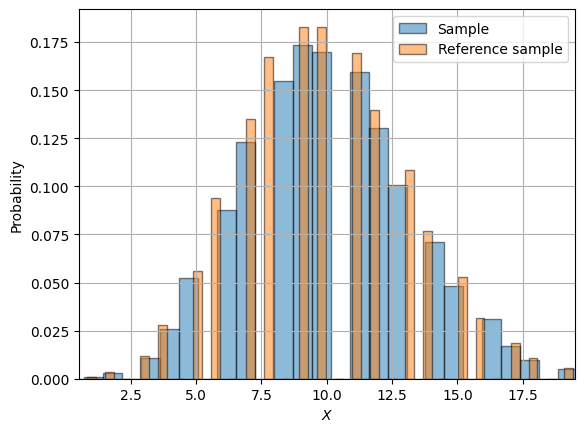

In [40]:
len = 100000
lam = 10
sample = pois_rnd_exp(lam, len)
sample2 = np.random.poisson(lam, len)
#grid = np.arange(np.ceil(lam - 3 * np.sqrt(lam)), np.ceil(lam + 3 * np.sqrt(lam))) #правило 3 сигм
fig, ax = plt.subplots()
ax.hist(sample, bins=40, alpha=0.5, rwidth=1, density=True, label='Sample', edgecolor='black')
ax.hist(sample2, bins=40, alpha=0.5, rwidth=0.5, density=True, label='Reference sample', edgecolor='black')
#ax.plot(grid, poisson.pmf(grid, lam), label='Empirical function')
ax.set_xlabel(r'$X$')
ax.set_ylabel("Probability")
ax.set_xlim([lam - 3 * math.sqrt(lam), lam + 3 * math.sqrt(lam)])
#ax.set_title(f"Poisson distribution with $\lambda$ = {lam}")
ax.legend()
ax.grid(True)
plt.savefig('pois1.eps', format='eps')
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


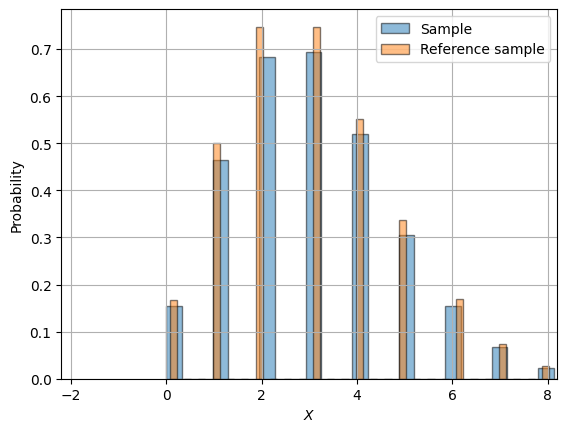

In [43]:
len = 100000
lam = 3
sample = pois_rnd_exp(lam, len)
sample2 = np.random.poisson(lam, len)
#grid = np.arange(np.ceil(lam - 3 * np.sqrt(lam)), np.ceil(lam + 3 * np.sqrt(lam))) #правило 3 сигм
fig, ax = plt.subplots()
ax.hist(sample, bins=40, alpha=0.5, rwidth=1, density=True, label='Sample', edgecolor='black')
ax.hist(sample2, bins=40, alpha=0.5, rwidth=0.5, density=True, label='Reference sample', edgecolor='black')
#ax.plot(grid, poisson.pmf(grid, lam), label='Empirical function')
ax.set_xlabel(r'$X$')
ax.set_ylabel("Probability")
ax.set_xlim([lam - 3 * math.sqrt(lam), lam + 3 * math.sqrt(lam)])
#ax.set_title(f"Poisson distribution with $\lambda$ = {lam}")
ax.legend()
ax.grid(True)
plt.savefig('pois2.eps', format='eps')
plt.show()

*3.4 Построить датчик пуассоновского распределения как предел биномиального распределения. Убедиться в корректности построенного датчика при помощи критерия $\chi^2$ Пирсона.*

Введём обозначения: $\\$
$P$ - пуассоновское распределение $\\$
$P_n$ - биномиальное распределение $\\$
Пусть параметры биномиального распределение изменяются следующим образом:
$$n \rightarrow + \infty, \quad p \rightarrow 0, \quad np \rightarrow \lambda$$
Тогда
$$\sup_A |P(A) - P_n(A)| \rightarrow 0$$


In [11]:
def pois_rnd_bin(lam, *shape):
    if lam < 0:
        raise ValueError(f"$\lambda$ = {lam} is less then 0!")
    n = 10**6
    p = lam / n 
    return binom_rnd(p, n, *shape)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


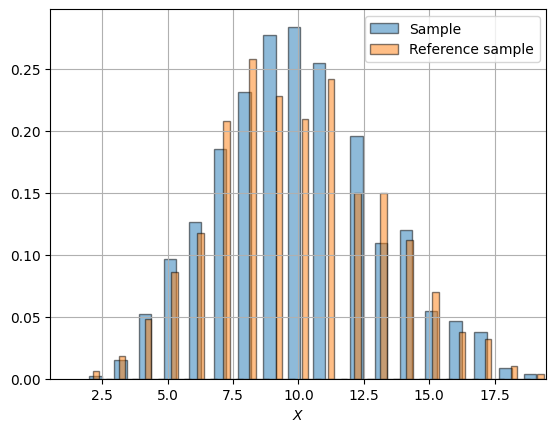

In [48]:
len = 1000
lam = 10
sample = pois_rnd_bin(lam, len)
sample2 = np.random.poisson(lam, len)
#grid = np.arange(np.ceil(lam - 3 * np.sqrt(lam)), np.ceil(lam + 3 * np.sqrt(lam))) #правило 3 сигм
fig, ax = plt.subplots()
ax.hist(sample, bins=40, alpha=0.5, rwidth=1, density=True, label='Sample', edgecolor='black')
ax.hist(sample2, bins=40, alpha=0.5, rwidth=0.5, density=True, label='Reference sample', edgecolor='black')
#ax.plot(grid, poisson.pmf(grid, lam), label='Empirical function')
ax.set_xlabel(r'$X$')
ax.set_xlim([lam - 3 * math.sqrt(lam), lam + 3 * math.sqrt(lam)])
#ax.set_title(f"Poisson distribution with $\lambda$ = {lam}")
ax.legend()
ax.grid(True)
plt.savefig('pois3.eps', format='eps')
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


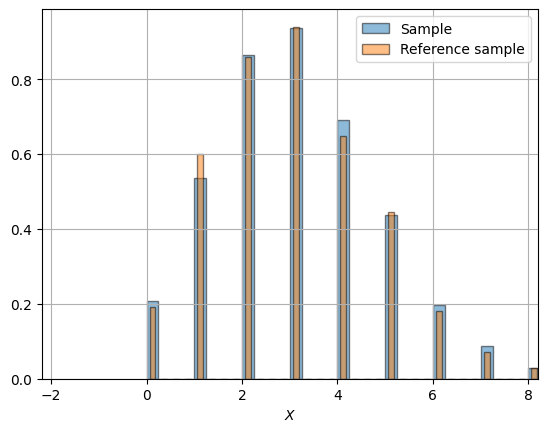

In [49]:
len = 1000
lam = 3
sample = pois_rnd_bin(lam, len)
sample2 = np.random.poisson(lam, len)
#grid = np.arange(np.ceil(lam - 3 * np.sqrt(lam)), np.ceil(lam + 3 * np.sqrt(lam))) #правило 3 сигм
fig, ax = plt.subplots()
ax.hist(sample, bins=40, alpha=0.5, rwidth=1, density=True, label='Sample', edgecolor='black')
ax.hist(sample2, bins=40, alpha=0.5, rwidth=0.5, density=True, label='Reference sample', edgecolor='black')
#ax.plot(grid, poisson.pmf(grid, lam), label='Empirical function')
ax.set_xlabel(r'$X$')
ax.set_xlim([lam - 3 * math.sqrt(lam), lam + 3 * math.sqrt(lam)])
#ax.set_title(f"Poisson distribution with $\lambda$ = {lam}")
ax.legend()
ax.grid(True)
plt.savefig('pois4.eps', format='eps')
plt.show()

[ 5  5  3  2  5  3  6  3  5  2  5  3  6  7  4  4  4  9  8  4  5  4  5  1
  3  8  2  2  7  4  6  3  7  6  6  7  3  6  4 11  3  4  3  7  3  2  4 11
  5  6  6  3  3  5  6 10  4  2  5  5  4  6  8  7  7  4  9  6  8  7  6  5
  5  7  8  7  7  3  7  3  2  2  1  1  3  6  3  7  5  1  4  8  4  4  6  5
  2  2  3  4  5  5  3 10  6  6  4  7  7  5  7  7  4  4  4  8  3  5  3  4
  5  5  6  7  5  8  7  8  2  6  7  4  6  6  8  7  9  9  5  4  8  8  5  5
  2  8  7  5  6  2  5  8  3  5  4  3  7  3 11  3  5  2  7 11  6 10  5  8
  6  7  3  4  4  2  5  9  5  4  8  8  4  2  4  3  4  6  4  3  5  2  6  1
  4  3  4  6  5  2  9  6  5  6  6  1  5  7  5  7  3  2  6  4  5  3  4  6
  7  7  5  5  6  6  4  6  6  1  3  8  4  8  6  5  5  5  8  8  2  6  8  8
  4  3  3  4  6  5  6  9  2  5  7  7  8  4  7  3  2 10  2  5  5  1  7  3
  8  4  4  5  2  4  5  8  4  6  2  6  4  6  3  5  4  4  6  5  2  1  4  4
 10  6  5  8  3  4  5  7  3 10  4  6  3  4  5  7  3  2  2  4  4  5  8  8
  5  3  0  5  3  5  2  6  7  1  5  3  4  3  5  4  6

(array([0.01285714, 0.        , 0.05571429, 0.        , 0.18857143,
        0.        , 0.29785714, 0.        , 0.36      , 0.        ,
        0.38785714, 0.        , 0.31714286, 0.        , 0.        ,
        0.25071429, 0.        , 0.15642857, 0.        , 0.05571429,
        0.        , 0.03857143, 0.        , 0.01928571, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.00214286]),
 array([ 0.        ,  0.46666667,  0.93333333,  1.4       ,  1.86666667,
         2.33333333,  2.8       ,  3.26666667,  3.73333333,  4.2       ,
         4.66666667,  5.13333333,  5.6       ,  6.06666667,  6.53333333,
         7.        ,  7.46666667,  7.93333333,  8.4       ,  8.86666667,
         9.33333333,  9.8       , 10.26666667, 10.73333333, 11.2       ,
        11.66666667, 12.13333333, 12.6       , 13.06666667, 13.53333333,
        14.        ]),
 <BarContainer object of 30 artists>)

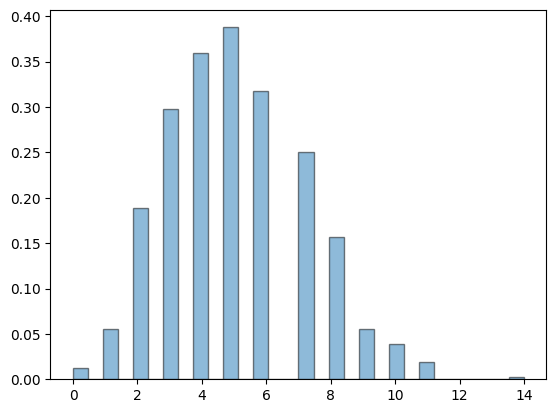

In [50]:
sample = pois_rnd_bin(5, 1000)
print(sample)
fig, ax = plt.subplots()
ax.hist(sample, bins=30, alpha=0.5, density=True, label='Sample', edgecolor='black')

Будем проверять датчик основываясь на значениях выборки, пресдтавленной выше. Нулевая гипотеза заключается в том, что частоты согласованы,то есть фактические данные не противоречат ожидаемым. Теоретическая вероятность равна:
$$p_k = \mathbb{P}(X = k) = \frac{\lambda^k}{k!}e^{-\lambda}, \quad k = [a_0, ..., a_s]$$
Теоретические частоты равны $n_k^w = n\cdot p_k$. $\\$
Счиатем эмпирические частоты $n_k$ как количество величин в выборке, принимающих значение $k$. Статистику $\chi^2$ определим следующим образом:
$$\chi^2 = \sum_{k=a_0}^{a_s} \frac{(n_k - n_k^w)^2}{n_k^w}.$$
Выберем разбиение $\delta$: $\delta_1 = {0, 1}, \delta_2 = {3}, \delta_3 = {4}, ..., \delta_8 = {9}, \delta_10 = {k > 9}$ $\\$
Таким образом, получим 9 степеней свободы. 
Принимаем нулевую гипотезу, если $\chi^2 \leq q$, где $q$ - квантиль распределения $\chi^2$

Сначала вычислим теоретические частоты. 

In [51]:
split = np.array([[0, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, np.infty]]) # по нему будем вычислять эмпирические частоты

In [52]:
def pois_theor(lam, n):
    prob = lambda k: lam ** k / np.prod(range(1, k + 1)) * np.exp(- lam)
    split = np.zeros(10)
    split[0] = prob(0) + prob(1)
    for i in range(1, 9):
        split[i] = prob(i + 1)
    split[9] = 1 - split[0:9].sum()
    return split * n

In [21]:
from scipy.stats import chi2

In [54]:
def chi_crit(lam, alpha, n, split_theor):
    sample = pois_rnd_bin(lam, n)
    q = chi2.ppf(1 - alpha, 9) #число степеней свободы
    split_emp = np.zeros(10)
    for i in range(10):
        split_emp[i] = ((sample >= split[i][0]) * (sample <= split[i][1])).sum()
    chi = ((split_emp - split_theor) ** 2 / split_theor).sum()
    if chi <= q:
        return True
    return False

In [57]:
n_test = 20
n = 1000
lam = 5
alpha = 0.02
n_matches = 0
split_theor = pois_theor(lam, n)
for i in range(n_test):
    n_matches += chi_crit(lam, alpha, n, split_theor)
print(f"Null hypotheses is accepted in {n_matches / n_test * 100:.2f} % cases")

Null hypotheses is accepted in 95.00 % cases


*3.5 Построить датчик стандартного нормального распределения методом моделирования случайных величин парами с переходом в полярные координаты. Проверить при помощи t-критерия Стъюдента равенство математических ожиданий, а при помощи критерия Фишера - равенство дисперсий.*

Рассмотрим пару $\eta \sim N(0, 1), \quad \xi \sim N(0, 1)$. Будем строить датчик стандартного нормального распределения, используя приведённые ниже комбинации датчиков.
$$\eta = \sqrt{\omega}\cos(\phi), \quad \xi = \sqrt{\omega}\sin(\phi)$$
Здесь $\omega \sim Exp(0.5),\quad \phi \sim U[0, 2\pi)$

In [12]:
def norm_B_M_rnd(*shape):
    len =int(np.prod(shape) / 2) # тк моделируем парами
    w = exp_rnd(0.5, len)
    phi = 2 * math.pi * np.random.uniform(0.0, 1.0, len)
    return np.reshape([np.sqrt(w) * np.cos(phi), np.sqrt(w) * np.sin(phi)], shape)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


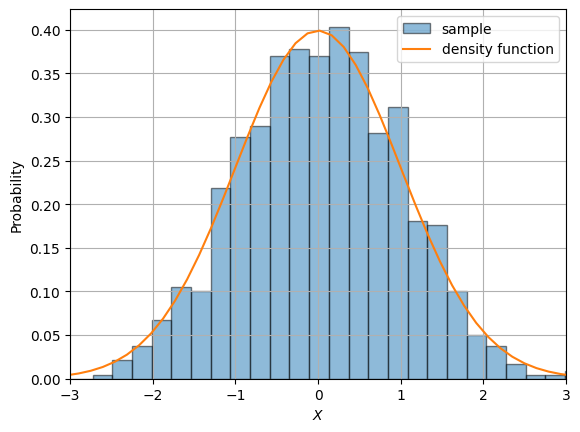

In [59]:
n = 1000
norm_sample = norm_B_M_rnd(n)
fig, ax = plt.subplots()
ax.hist(norm_sample, bins=30, alpha=0.5, density=True, label='sample', edgecolor='black')
ax.plot(x := np.linspace(norm_sample.min(), norm_sample.max()), 1 / math.sqrt(2 * math.pi) * np.exp(- x ** 2 / 2), label="density function") #функция плотности вероятности
#ax.set_ylim()
ax.set_xlim([-3, 3])
ax.set_xlabel(r'$X$')
ax.set_ylabel("Probability")
#ax.set_title(f"Standard normal distribution with")
ax.legend()
ax.grid(True)
plt.savefig('norm.eps', format='eps')
plt.show()

Рассматриваем выборку $X_1,...,X_n$ из нормального распределения. Статистику в t-критерии Стъюдента определяем следующим образом:
$$t = \sqrt{n}\frac{\overline{X} - \mu}{S}.$$
Здесь $S^2$ - несмещённая выборочная дисперсия. Степеней свободы $n - 1$. Нулевая гипотеза заключается в том, что математическое ожидание полученной выборки равно единице. Критерий Стъюдента имеет двустороннюю критическую область, следовательно нулевая гипотеза принимается, если $|t| <= q$, где $q(1 - \frac{\alpha}{2})$ - квантиль распределения с $n-1$ степенью свободы.   

In [13]:
from scipy.stats import t
from statistics import variance

In [61]:
def Student_crit(n, alpha):
    sample = norm_B_M_rnd(n)
    q = t.ppf(1 - alpha / 2, n - 1)
    stat = math.sqrt(n) * sample.mean() / sample.std()
    if np.abs(stat) <= q:
        return True
    return False

In [68]:
n_test = 1000
n = 1000
alpha = 0.1
n_matches = 0
for i in range(n_test):
    n_matches += Student_crit(n, alpha)
print(f"Null hypotheses is accepted in {n_matches / n_test * 100:.2f} % cases")

Null hypotheses is accepted in 89.70 % cases


В критерии Фишера можем сравнивать между собой только две выборки, поэтому в качестве одной возьмем выборку, сгенерированную построенным датчиком $X_1,...,X_n, а в качестве второй - np.random.randn Y_1,...,Y_m. Статистика определяется следующим образом:
$$F = \frac{S_X^2}{S_Y^2}$$
со степенями свободы $m - 1, n - 1$. Критерий Фишера имеет двустороннюю критическую область, следовательно нулевая гипотеза принимается $q_1(\frac{\alpha}{2}) \leq F \leq q_2(1 - \frac{\alpha}{2})$, где $q_1, q_2$ - квантили со степенями свободы $n - 1, m - 1$.

In [69]:
from scipy.stats import f

In [70]:
def Fisher_crit(n, m, alpha):
    sample_x = norm_B_M_rnd(n)
    sample_y = np.random.randn(m)
    stat = sample_x.std() ** 2 / (sample_y.std() ** 2)
    q1 = f.ppf(alpha / 2, n - 1, m - 1)
    q2 = f.ppf(1 - alpha / 2, n - 1, m - 1)
    if stat >= q1 and stat <= q2:
        return True
    return False

In [76]:
n_test = 1000
n = 1000
m = 900
alpha = 0.1
n_matches = 0
for i in range(n_test):
    n_matches += Fisher_crit(n, m, alpha)
print(f"Null hypotheses is accepted in {n_matches / n_test * 100:.2f} % cases")

Null hypotheses is accepted in 91.10 % cases


# Задание 4

*4.1 Построить датчик распределения Коши*

Случайная величина $X$ имеет распределение Коши с параметрами $x_0$ и $\gamma$, если её функция распределения имеет вид
$$F_X(x) = \frac{1}{\pi}\arctg\big(\frac{x - x_0}{\gamma}\big) + \frac{1}{2}$$ 
В данном случае можем воспользоваться методом обратных функций:
$$y = \frac{1}{\pi}\arctg\big(\frac{x - x_0}{\gamma}\big) + \frac{1}{2}$$
$$\tg(\pi(y - \frac{1}{2})) = \frac{x - x_0}{\gamma}$$
$$x = x_0 + \gamma \tg(\pi(y - \frac{1}{2}))$$
Таким образом, случайная величина $X$ имеет распределение Коши с параметрами $x_0, \gamma$, если $X = x_0 + \gamma \tg(\pi(Y - \frac{1}{2}))$, где $Y \sim U[0, 1]$.

In [14]:
def Cauchy_rnd(x0, gamma, *shape):
    if gamma <= 0:
        raise ValueError(f"$\gamma$ = {gamma} is less then 0!")
    unif_sample = np.random.uniform(0.0, 1.0, *shape)
    return x0 + gamma * np.tan(math.pi * (unif_sample - 0.5))

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


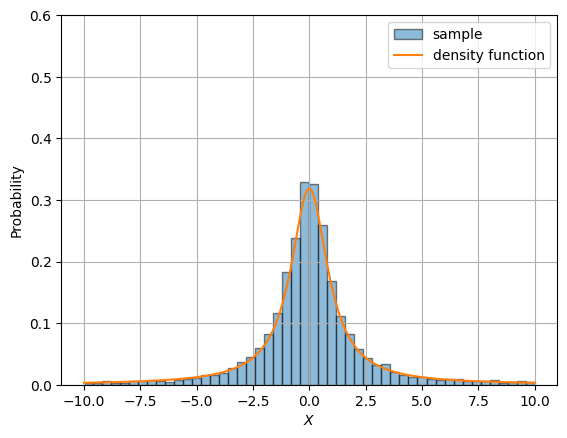

In [78]:
x0 = 0
gamma = 1
density_th = lambda x: 1 / (math.pi * gamma * (1 + ((x - x0) / gamma)**2))
n = 10000
Cauchy_sample = Cauchy_rnd(x0, gamma, n)
fig, ax = plt.subplots()
ax.hist(Cauchy_sample, bins=50, alpha=0.5, range=(-10, 10), density=True, label='sample', edgecolor='black')
ax.plot(x := np.linspace(-10, 10, n), density_th(x), label="density function") #функция плотности вероятности
ax.set_ylim([0, 0.6])
#ax.set_xlim([0, exp_sample.max()])
ax.set_xlabel(r'$X$')
ax.set_ylabel("Probability")
#ax.set_title(f"Cauchy distribution with $x_0$ = {x0}, $\gamma$ = {gamma}")
ax.legend()
ax.grid(True)
plt.savefig('cauch.eps', format='eps')
plt.show()

*4.2 На основе датчика распределения Коши с помощью метода фон Неймана построить датчик стандартного нормального распределения. При помощи графика normal probability plot убедиться в корректности построенного датчика и обосновать наблюдаемую линейную зависимость*

Имеется две функции плотности распределения: $p_1$ - плотностть распределения Коши, $p_2$ - плотность стандартного нормального распределения. 
$$p_1(x) = \frac{1}{\pi} \cdot \frac{\gamma}{(x - x_0)^2 + \gamma^2}$$
В нашем случае $$p_1(x) = \frac{1}{\pi} \cdot \frac{1}{(x)^2 + 1}$$
$$p_2(x) = \frac{1}{\sqrt{2\pi}}e^{-\frac{x^2}{2}}$$
Метод фон Неймана применяется если существует константа $k$:
$$\sup_x \frac{p_2}{p_1} \leq k$$
Утверждается, что наилучшим выбором константы является:
$$k = \sqrt{\frac{2\pi}{e}}$$ 

Будем строить датчик нормального распределения по следующему алгоритму: $\\$
1. Генерируем случайную величину $X$ с распределением Коши $\\$
2. Вычисляем значение $q = \frac{p_2(X)}{k p_1(X)}$
3. С помощью генератора схемы Бернулли с параметром $q$ находим случайную величину $V$.
Повторяем эти шаги до тем пор, пока V не станет равным 1. 

In [15]:
def norm_rnd_single():
    p1 = lambda x: 1 / math.pi * 1 / (x ** 2 + 1)
    p2 = lambda x: 1 / math.sqrt(2 * math.pi) * math.exp(- x ** 2 / 2)
    k = math.sqrt(2 * math.pi / np.exp(1))
    v = 0
    while v != 1:
        X = Cauchy_rnd(0, 1, 1)
        q = p2(X) / (k * p1(X))
        v = bern_rnd(q, 1)
    return X

In [16]:
def norm_Neumann_rnd(*shape):
    len = np.prod(shape)
    res = []
    for i in range(len):
        res.append(norm_rnd_single())
    return np.reshape(res, shape)

C:\Users\Настя\AppData\Local\Temp\ipykernel_8868\828466127.py:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  p2 = lambda x: 1 / math.sqrt(2 * math.pi) * math.exp(- x ** 2 / 2)


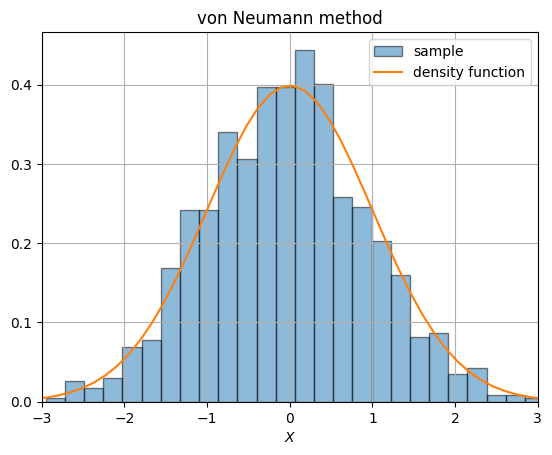

In [34]:
n = 1000
norm_sample = norm_Neumann_rnd(n)
fig, ax = plt.subplots()
ax.hist(norm_sample, bins=30, alpha=0.5, density=True, label='sample', edgecolor='black')
ax.plot(x := np.linspace(norm_sample.min(), norm_sample.max()), 1 / math.sqrt(2 * math.pi) * np.exp(- x ** 2 / 2), label="density function") #функция плотности вероятности
#ax.set_ylim()
ax.set_xlim([-3, 3])
ax.set_xlabel(r'$X$')
ax.set_title(f"von Neumann method")
ax.legend()
ax.grid(True)
plt.show()

normal probability plot - это нрафический способ определить, принадлежит выборка нормальному распределению или нет. На этом графике данные наносятся на график теоретического нормального распределения таким образом, что если данная выборка из нормального распределения, точки должны образовывать график линейной зависимости.

In [17]:
from scipy.stats import probplot

C:\Users\Настя\AppData\Local\Temp\ipykernel_8868\828466127.py:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  p2 = lambda x: 1 / math.sqrt(2 * math.pi) * math.exp(- x ** 2 / 2)


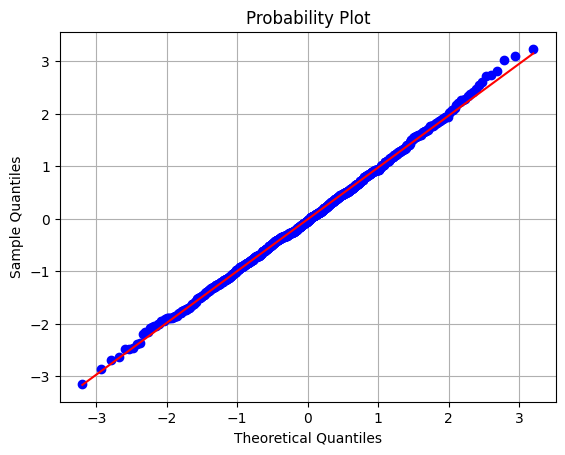

In [51]:
n = 1000
sample_norm = norm_Neumann_rnd(n)
fig, ax = plt.subplots()
probplot(sample_norm, dist='norm', fit=True, plot=ax)
plt.grid(True)
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Sample Quantiles")
plt.show()


*4.3 Сравнить скорость моделирования стандартного нормального распределения в задании 3 и в задании 4*

In [18]:
import time

9


C:\Users\Настя\AppData\Local\Temp\ipykernel_8868\828466127.py:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  p2 = lambda x: 1 / math.sqrt(2 * math.pi) * math.exp(- x ** 2 / 2)


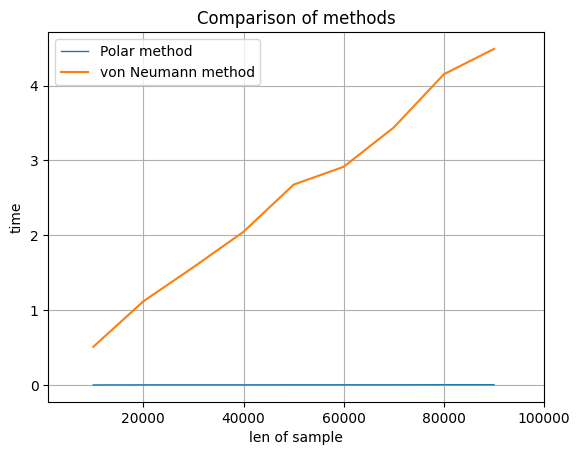

In [ ]:
step = 100
num_exp = 100
lens = np.arange(10000, 100000, step)
print(len(lens))
time_B_M = np.zeros(len(lens))
time_Neumann = np.zeros(len(lens))
for i in range(len(lens)):
    time_help1 = np.zeros(num_exp)
    time_help2 = np.zeros(num_exp)
    for j in range(num_exp):
        time_help1[j] = time.time()
        norm_B_M_rnd(lens[i])
        time_help1[j] = time.time() - time_help1[j]
        time_help2[j] = time.time()
        norm_Neumann_rnd(lens[i])
        time_help2[j] = time.time() - time_help2[j]
    time_B_M[i] = np.median(time_help1)
    time_Neumann[i] = np.median(time_help2)
plt.plot(lens, time_B_M, linewidth=1, label="Polar method")
plt.plot(lens, time_Neumann, label="von Neumann method")
plt.xlim([1000, 100000])
plt.xlabel('len of sample')
plt.ylabel('time')
plt.title("Comparison of methods")
plt.legend()
plt.grid(True)
plt.show()


Видим, что генерация с помощью преобразования Бокса-Мллера занимает значительно меньше времени. В дальнейшем в качестве датчика нормального распределения будем использовать функцию norm_B_M_rnd.

# Задание 5

*5.1 Пусть $X_i \sim N(\mu, \sigma^2)$. Убедиться эмпирически в справедливости теоремы о законе больших чисел и центральной предельной теоремы: исследовать поведение суммы $S_n = \sum_{i=1}^{n}X_i$ и эмпирического распределения величины $\sqrt{n}\dfrac{S_n}{n} - a$*

ЗБЧ: $\\$
Пусть Пусть $X_1, X_2,...$ - последовательность независимых одинаково распределённых случайных величин с $\mathbb{E}X_1^2 < \infty$ и $S_n = X_1 + ... + X_n$. Тогда $\forall \epsilon > 0$ справедливо
$$\lim_{n \rightarrow +\infty} \mathbb{P}(|\frac{S_n}{n} - \mu| < \epsilon) = 1$$
Далее построим графики функции $y_1 = \frac{S_n}{n}$ и $y_2 = \mu$. Тем самым проверим выполнение ЗБЧ.

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


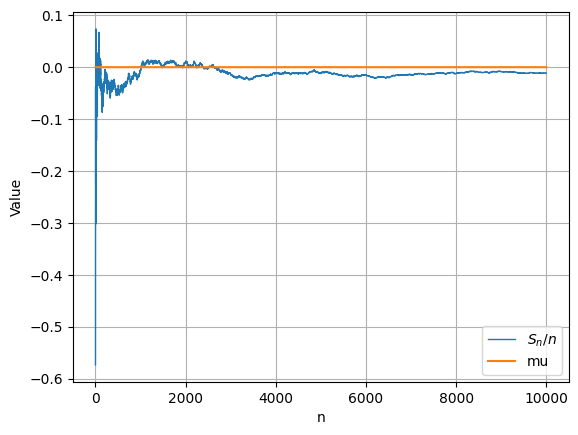

In [26]:
len = 10000
s_n = norm_B_M_rnd(len)
mu = 0
n = np.linspace(1, len + 1, len)
s_n = s_n.cumsum()
s_n = s_n / n
plt.plot(n, s_n, linewidth=1, label="$S_n / n$")
plt.plot(n, mu * np.ones(len), label="mu")
#plt.xlim([1000, 100000])
plt.xlabel('n')
plt.ylabel('Value')
#plt.title("Law of large numbers")
plt.legend()
plt.grid(True)
plt.savefig('zbch1.eps', format='eps')
plt.show()

ЦПТ: $\\$
Пусть $X_1, X_2,...$ - последовательность независимых одинаково распределённых случайных величин с $\mathbb{E}X_1^2 < \infty$ и $S_n = X_1 + ... + X_n$. Тогда при $n \rightarrow \infty$ для $\forall x \in \mathbb{R}$ имеем
$$\mathbb{P}(\frac{S_n - \mu}{\sigma} \leq x) \rightarrow N(0, 1)$$

$$\mathbb{E}\frac{S_n}{n} = \frac{1}{n}\mathbb{E}\sum_{i=1}^{n}X_i = \frac{n \cdot \mu}{n} = \mu$$
$$var(\frac{s_n}{n}) = \frac{1}{n^2}var(S_n) = \frac{n \cdot \sigma^2}{n^2} = \frac{\sigma^2}{n}$$
Из ЦПТ получим, что $\frac{S_n}{n} \sim N(\mu, \frac{\sigma^2}{n})$. Теперь рассмотрим случайную величину $Y = \sqrt{n}\dfrac{S_n}{n} - a$.
$$\mathbb{E}Y = \sqrt{n}\mathbb{\frac{S_n}{n}} - \mathbb{E}a = \sqrt{n}\cdot \mu - a$$
$$var(Y) = n \cdot var(\frac{S_n}{n}) - var(a) = \frac{n \cdot \sigma^2}{n} = \sigma^2$$
Таким образом, $Y \sim N(\sqrt{n}\cdot \mu - a, \sigma^2)$

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


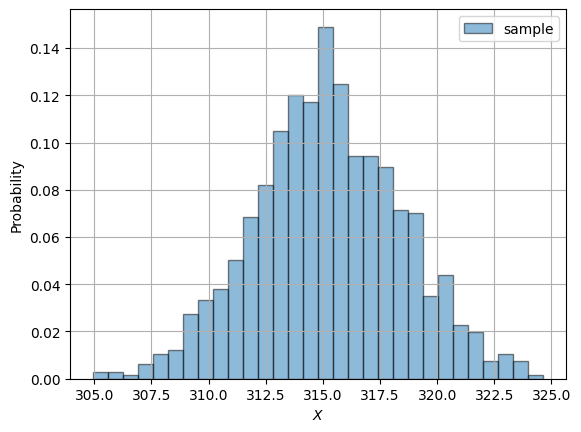

In [19]:
mu = 1
sigma = 1
a = 1
len = 10000
n = 1000
sample = sigma * norm_Neumann_rnd(len, n) + mu
s_n = sample.sum(0)
y = math.sqrt(n) * s_n / n - a
#density = lambda x, mu, sigma: 1 /sigma / math.sqrt(2 * math.pi) * np.exp(- (x - mu) ** 2 / (2 * sigma ** 2))
fig, ax = plt.subplots()
ax.hist(y, bins=30, alpha=0.5, density=True, label='sample', edgecolor='black')
#ax.plot(x := np.linspace(y.min(), y.max()), density(x, math.sqrt(n) * mu - a, sigma), label="density function") #функция плотности вероятности
#ax.set_ylim()
#ax.set_xlim([-3, 3])
ax.set_xlabel(r'$X$')
ax.set_ylabel("Probability")
#ax.set_title(f"von Neumann method")
ax.legend()
ax.grid(True)
plt.savefig('zpt1.eps', format='eps')
plt.show()

*5.2 Считая $\mu, \sigma$ неизвестными, построить доверительные интервалы для среднего и дисперсии по имеющейся выборке*

Доверительные интервалы для математического ожидания будем строить, используя t-критерий Стъюдента. 
$$t = \sqrt{n}\frac{\overline{X} - \mu}{S}.$$
Пусть $q(\alpha, n - 1)$ - квантили порядка $\alpha$ для распределения Стъюдента с числом степеней свободы $n - 1$.
Тогда доверительный интервал модем строить следующим образом:
$$\mathbb{P}(q(\frac{1 - \alpha}{2}, n - 1) \leq t \leq q(\frac{1 + \alpha}{2}, n - 1)) = \alpha$$
$$\mathbb{P}(- q(\frac{1 + \alpha}{2}, n - 1) \leq t \leq q(\frac{1 + \alpha}{2}, n - 1)) = \alpha$$
$$\mathbb{P}(- q(\frac{1 + \alpha}{2}, n - 1) \leq \sqrt{n}\frac{\overline{X} - \mu}{S} \leq q(\frac{1 + \alpha}{2}, n - 1)) = \alpha$$
$$\mathbb{P}(\overline{X} - \frac{S}{\sqrt{n}} q(\frac{1 + \alpha}{2}, n - 1) \leq \mu \leq \overline{X} + \frac{S}{\sqrt{n}} q(\frac{1 + \alpha}{2}, n - 1)) = \alpha$$

Text(0, 0.5, 'mean')

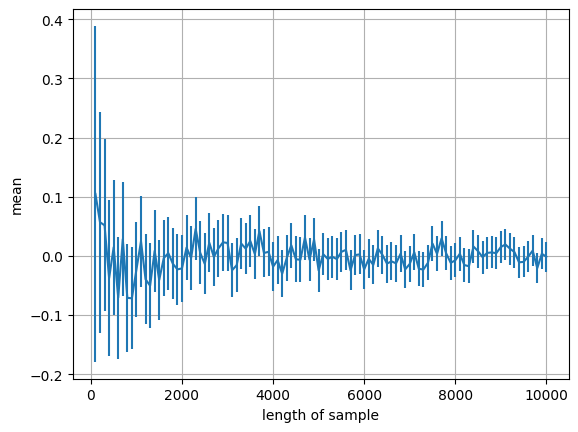

In [68]:
mu = 0
sigma = 1
num_exp = 100
alpha = 0.8
#print(num_exp)
lens =np.ceil(np.linspace(100, 10000, num_exp)).astype(int)
#print(lens)
yerr = np.zeros(num_exp)
#print(len(yerr))
samp_mean = np.zeros(num_exp)
for i in range(num_exp):
    sample = sigma * norm_B_M_rnd(lens[i]) + mu
    q = t.ppf((1 + alpha) / 2, lens[i] - 1)
    yerr[i] = 2 * sample.std() / np.sqrt(lens[i]) * q
    samp_mean[i] = sample.mean()

fig, ax = plt.subplots()
ax.errorbar(lens, samp_mean, yerr=yerr)
ax.grid(True)
ax.set_xlabel("length of sample")
ax.set_ylabel("mean")
plt.savefig('di_mat_ozh.eps', format='eps')

Аналогичным способом поступим для поиска доверительных интервалов дисперсии. Используем критерий $\chi^2$:
$$\mathbb{P}(q(\frac{1 - \alpha}{2}, n - 1) \leq \frac{(n - 1) 
\cdot S^2}{\sigma^2} \leq q(\frac{1 + \alpha}{2}, n - 1)) = \alpha$$
$$\mathbb{P}(\frac{(n - 1) \cdot S^2}{q(\frac{1 + \alpha}{2}, n - 1)} \leq \sigma^2 \leq \frac{(n - 1) \cdot S^2}{q(\frac{1 - \alpha}{2}, n - 1)}) = \alpha$$

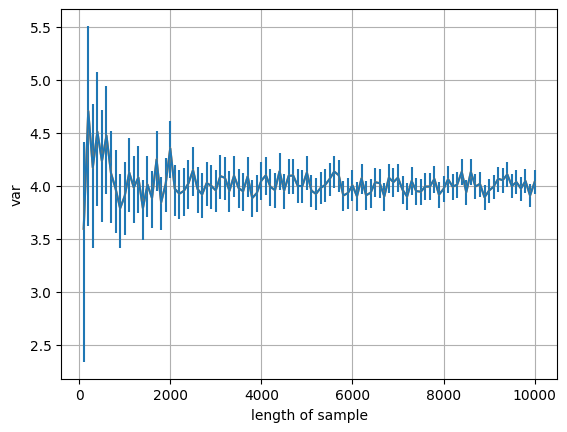

In [22]:
mu = 1
sigma = 2
num_exp = 100
alpha = 0.95
#print(num_exp)
lens =np.ceil(np.linspace(100, 10000, num_exp)).astype(int)
#print(lens)
yerr = np.zeros((2, num_exp))
#print(len(yerr))
samp_var = np.zeros(num_exp)
for i in range(num_exp):
    sample = sigma * norm_B_M_rnd(lens[i]) + mu
    q1 = chi2.ppf((1 + alpha) / 2, lens[i] - 1)
    # print(q1)
    # print(q2)
    q2 = chi2.ppf((1 - alpha) / 2, lens[i] - 1)
    samp_var[i] = sample.var(ddof=1)
    yerr[1][i] = (samp_var[i] - (lens[i] - 1) * sample.var(ddof=1) / q1) 
    yerr[0][i] =((lens[i] - 1) * sample.var(ddof=1) / q2 - samp_var[i]) 

fig, ax = plt.subplots()
ax.errorbar(lens, samp_var, yerr=yerr)
ax.plot(lens, samp_var)
ax.grid(True)
ax.set_xlabel("length of sample")
ax.set_ylabel("var")
plt.savefig('di_var.eps', format='eps')

*5.3 Пусть $X_i \sim K(a, b)$ - имеет распределение Коши с параметром сдвига $a$ и ммасштаба $b$. Изучть эмпирически как ведут себя суммы $\frac{S_n}{n}$, объяснить результат и найти закон распределения данных сумм.*

Доказательство проведём с помощью характеристических функций. Как известно характеристическая функция случайной величины $X \sim K(a, b)$ равна:
$$\phi_X(t) = e^{iat - b|t|}$$
Рассмотрим характеристическую функцию для случайной величины $Y = \frac{S_n}{n}$:
$$\phi_Y(t) = \mathbb{E}e^{itY} = \mathbb{E}e^{\dfrac{it \sum_{i=1}^{n}X_i}{n}} = (\mathbb{E}e^{\dfrac{it}{n}X})^n = \phi_X^n(\frac{t}{n}) = e^{iat - b|t|}.$$
Таким образом доказано, что $Y \sim K(a, b)$

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


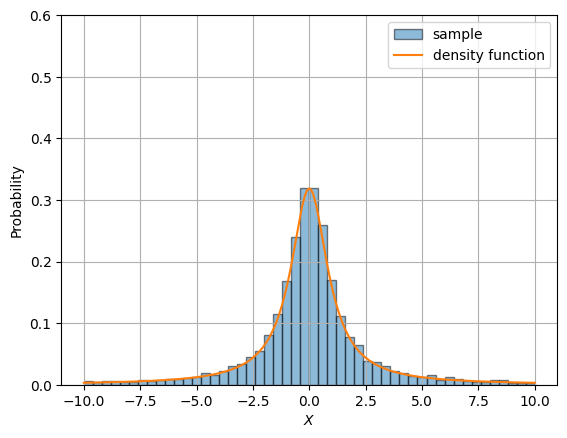

In [23]:
n = 1000
len = 10000
a = 0
b = 1
sample = Cauchy_rnd(a, b, (n, len)).sum(0) / n

density_th = lambda x: 1 / (math.pi * b * (1 + ((x - a) / b)**2))
fig, ax = plt.subplots()
ax.hist(sample, bins=50, alpha=0.5, range=(-10, 10), density=True, label='sample', edgecolor='black')
ax.plot(x := np.linspace(-10, 10, n), density_th(x), label="density function") #функция плотности вероятности
ax.set_ylim([0, 0.6])
#ax.set_xlim([0, exp_sample.max()])
ax.set_xlabel(r'$X$')
ax.set_ylabel("Probability")
#ax.set_title(f"Cauchy distribution with $x_0$ = {a}, $\gamma$ = {b}")
ax.legend()
ax.grid(True)
plt.savefig('cauch_sum.eps', format='eps')
plt.show()

# Задание 6

*Вычислить следующий интеграл:* 
$$\int_{-\infty}^{+\infty} ...\int_{-\infty}^{+\infty}\frac{e^{-(x_1^2+...+x_{10}^2 + \frac{1}{2^7 \cdot x_1^2 \cdot ... \cdot x_10^2})}}{x_1^2 \cdot ...\cdot x_10^2}dx_1 dx_2...dx_{10}$$
*1. Методом Монте-Карло $\\$ 2. Методом квадратур, сводя задачу к к вычислению собственного интеграла Римана*

Представим интеграл в виде:
$$\int_{-\infty}^{+\infty} ...\int_{-\infty}^{+\infty} \pi^5 \frac{e^{-\frac{1}{2^7 \cdot x_1^2 \cdot ... \cdot x_{10}^2}}}{x_1^2 \cdot ...\cdot x_10^2} \cdot \frac{1}{\pi^5}e^{-(x_1^2+...+x_{10}^2)}dx_1 dx_2...dx_{10}$$
Введём обозначения:
$$f = \pi^5 \frac{e^{-\frac{1}{2^7 \cdot x_1^2 \cdot ... \cdot x_{10}^2}}}{x_1^2 \cdot ...\cdot x_{10}^2}$$
$$g = \frac{1}{\pi^5}e^{-(x_1^2+...+x_{10}^2)} = \frac{e^{-\frac{(x_1 - 0)^2}{1} - ... - \frac{(x_{10} - 0)^2}{1}}}{\sqrt{\pi}\cdot ... \cdot \sqrt{\pi}}$$
Таким образом, фукция $g$ - совместная плотность независимых случайных величин $x_1, ...,x_{10}$, где $x_i \sim N(0,\frac{1}{2})$.
Таким образом, интеграл монжно представить в виде: $\mathbb{E}f(x_1,...,x_{10}), \quad x_i \sim N(0,\frac{1}{2})$.
Используя ЗБЧ, можем находить интеграл как $\frac{S_n}{n},\quad S_n = \sum_{i_j={1,..,n}}f(x_{i_1}, ..., x_{i_10})$

In [27]:
def monte_carlo_meth(iter_num):
    f = lambda y: math.pi  ** 5 * y * np.exp(- y / 2 ** 7)
    x = (np.random.randn(10, iter_num) * np.sqrt(1 / 2)).prod(0) ** (-2)
    return f(x).mean()

In [32]:
print(monte_carlo_meth(1000000))

126.0350276190587


Посчитаем интеграл методом квадратур. Видно что подинтегральная функция $h$ чётная, значит $I = 2^{10}\int_{0}^{+\infty} ...\int_{0}^{+\infty}h$. Далее сделаем замену 
$$x_i = \tg{\frac{\pi}{2}t_i},\quad t_i \in(0, 1)$$
Тогда интеграл преобразуется к виду
$$I = \pi^{10} \int_{0}^{1} ...\int_{0}^{1}\frac{\exp\{-\sum_{i=1}^{10} \tg^2(\frac{\pi}{2}t_i) - \frac{1}{2^7\prod_{i=1}^{10} \tg^2(\frac{\pi}{2}t_i)}\}}{\prod_{i=1}^{10}\sin^2(\frac{\pi}{2}t_i)}dt_1...dt_{10}$$
В качестве метода квадратур выберем метод прямоугольников. Для этого необходимо разбить отрезки [0, 1] на N равных частей:
$$0=x_k^0<x_k^2<\ldots<x_k^{2 N}=1,~ k=1, \ldots, 10.$$
У каждого отрезка в разбиении вычислим середину:
$$x_k^1, x_k^3, \ldots, x_k^{2 N-1},~ k=1, \ldots, 10.$$
В этих точках будем считать подинтегральную функцию.
Тогда искомый интеграл можем вычислять по формуле
$$I = \left( \dfrac{\pi}{N} \right)^{10} \sum_{i=1}^{N}\dots\sum_{i_{10}=1}^{N} h(x_1^{2i_1 - 1}, x_2^{2i_2 - 1}, \dots, x_{10}^{2i_{10} - 1})$$
Заметим, что значение интеграла не зависит от порядка интегрирования, поэтому для ускорения работы функции интеграл представим в виде:
$$I = \left( \dfrac{\pi}{N} \right)^{10} \sum_{1\leq i_0\leq i_1\leq\dots \leq i_{10}\leq N} С^{m}_{m_1, \ldots, m_l} ~ h(x_1^{2i_1 - 1}, x_2^{2i_2 - 1}, \dots, x_{10}^{2i_{10} - 1})$$
Здесь 
$$С^{m}_{m_1, \ldots, m_l} = \frac{10!}{m_1!m_2!\cdots m_{l}!},$$
где $m_k!$ - количество индексов в наборе $(i_1,i_2,\dots,i_{10})$, равных $k$.


In [33]:
from itertools import combinations_with_replacement

In [34]:
def int_func(t): #вычисление подинтегральной функции
    tg_part = np.power(np.tan(math.pi / 2 * t), 2)
    sin_part = (np.power(np.sin(math.pi / 2 * t), 2)).prod()
    return np.exp(-tg_part.sum() - (1 / 2**7 / tg_part.prod())) / sin_part

In [35]:
def special_const(sum_ind):
    val, counts = np.unique(sum_ind, return_counts=True)
    denom = 1
    for i in range(len(counts)):
        denom = denom * math.factorial(counts[i])
    return math.factorial(10) / denom

In [36]:
def quadr_meth(N):
    integral = 0
    grid = np.linspace(0.5 / (N + 1), 1 - 0.5/(N + 1), N, )
    C_i = combinations_with_replacement(np.arange(0, N), 10)#всевозможные индексы
    for sum_ind in C_i:
        variables = grid[list(sum_ind)]
        const = special_const(sum_ind)
        integral += const * int_func(variables)
        #integral += special_const(sum_ind) * int_func(variables)
    return (math.pi / N) ** 10 * integral

In [38]:
print(quadr_meth(10))

TypeError: 'int' object is not callable

Рассмотрим различия методов

In [ ]:
num_exp = 10
lens =np.ceil(np.linspace(1000, 10000, num_exp)).astype(int)
monte_carlo_val = np.zeros(num_exp)
quadr_val = np.zeros(num_exp)
for i in range(num_exp):
    monte_carlo_val[i] = monte_carlo_meth(lens[i])
    quadr_val[i] = quadr_meth(lens[i])
fig, ax = plt.subplots()
ax.plot(lens, monte_carlo_val, label="Monte-Carlo meth") 
ax.plot(lens, quadr_val, label="Quadrature meth") 
#ax.set_ylim([0, 0.6])
#ax.set_xlim([0, exp_sample.max()])
ax.set_xlabel(r'$N$')
#ax.set_title(f"Cauchy distribution with $x_0$ = {a}, $\gamma$ = {b}")
ax.legend()
ax.grid(True)
plt.show()

Эта ячейка выполняется очень долго (> 2 часов)! При оформлении отчета лучше взять размерности поменьше.